In [1]:
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns

### Question 1 and 2

The following class *BlackScholesModel* contains functions to calculate the price (*_calculate_call_option_price*) and the delta (*_calculate_call_delta*) for an European call option.

In [2]:
def Call(t,x,T,K,r,sigma):
    """
    input: t,x,T,K,r,sigma
    output: BS price of European call option
    """
    if t==T:
        return max(x-K,0)
    d1=(np.log(x/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=d1-sigma*(T-t)
    price=x*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2)
    return price

def Delta(t,x,T,K,r,sigma):
    if t==T:
        return 0
    d1=(np.log(x/K)+(r+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))
    return norm.cdf(d1)

### Question 3

Since we need $\frac{(S(T)-K)^{+}}{B(T)}$ to be a martingale under a certain probability measure if we want the expectation denote the price of an European call option. Under probability measure $\mathbb{P}$, we have
$$
\begin{align*}
\mathrm{d}\frac{S(t)}{B(t)} = \frac{S(t)}{B(t)}(\alpha-r)\mathrm{d}t + \frac{\sigma}{B(t)} S(t) \mathrm{d}W(t),
\end{align*}
$$
which has a drift when $\alpha \neq r$ and hence not a martingale, so is $\frac{(S(T)-K)^{+}}{B(T)}$. Under probability measure $\mathbb{\tilde{P}}$, we have
$$
\begin{align*}
\mathrm{d}\frac{S(t)}{B(t)} = \frac{\sigma S(t)}{B(t)}\mathrm{d}\tilde{W}(t),
\end{align*}
$$
which has not got a drift and hence is a martingale, so is $\frac{(S(T)-K)^{+}}{B(T)}$. So we can use $\mathbb{\tilde{E}}(\frac{(S(T)-K)^{+}}{B(T)})$ to get the call option price.

### Question 4

First we set up parameters.

In [3]:
T = 1
S0 = 100
K = 100
r = 0.03
alpha = 0.08
sigma = 0.2

$$
\begin{align*}
Y_{t+\frac{1}{n}} =& S_{t+\frac{1}{n}} / S_t \\
=& \frac{\exp[{\sigma W_{t+\frac{1}{n}} + (\alpha-\frac{1}{2}\sigma^2)}(t+\frac{1}{n})]}{\exp[{\sigma W_t + (\alpha-\frac{1}{2}\sigma^2)}t]} \\
=& \exp[\frac{1}{n}(\alpha-\frac{1}{2}\sigma^2)]\cdot \exp[\sigma(W_{t+\frac{1}{n}} - W_t)], \\
\ln Y_{t+\frac{1}{n}} =& \frac{1}{n}(\alpha-\frac{1}{2}\sigma^2) + \sigma(W_{t+\frac{1}{n}} - W_t)
\end{align*}
$$

From the above equation we know that $\ln Y_{t+\frac{1}{n}}\sim N(\frac{1}{n}(\alpha-\frac{1}{2}\sigma^2), \frac{\sigma^2}{n})$ and hence $ Y_{t+\frac{1}{n}}\sim Log\text{-}N(\frac{1}{n}(\alpha-\frac{1}{2}\sigma^2), \frac{\sigma^2}{n})$.

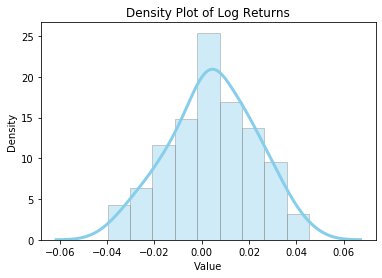

In [4]:
n = 100
np.random.seed(4396)
logy = np.random.normal(1/n * (alpha - 1/2 * sigma**2), sigma/np.sqrt(n), n)
sns.distplot(logy, hist=True, kde=True, 
             color = 'skyblue',
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 3})
plt.title('Density Plot of Log Returns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

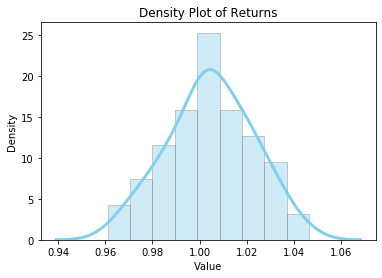

In [5]:
np.random.seed(4396)
y = np.random.lognormal(1/n * (alpha - 1/2 * sigma**2), sigma/np.sqrt(n), n)
sns.distplot(y, hist=True, kde=True, 
             color = 'skyblue',
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 3})
plt.title('Density Plot of Returns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [4]:
def GBM_sim(S0, alpha, T, sigma, n):
    '''
    Simulates a single path of Geometric Brownian Motion
    
    Args:
        S - initial path value
        mu - mean parameter
        T - time parameter
        sigma - volatility parameter
        N - number of steps in the path
    '''
    dt = T/n
    
    dlnSts = (alpha-0.5*sigma**2)*np.ones(n)*T/n+sigma*np.sqrt(T/n)*np.random.normal(size=n)
    dlnBs = r*np.ones(n)*T/n
    
    lnSts = np.nancumsum(np.concatenate((np.log([S0]),dlnSts)))
    S = np.exp(lnSts)
    
    # W = np.random.standard_normal(size=n-1)
    # W = np.array([0] + list(np.cumsum(W)*np.sqrt(dt)))
    t = np.linspace(0, T, n+1)
    # S = S0*np.exp((alpha - 0.5*sigma**2)*t + sigma*W)
    return S,t

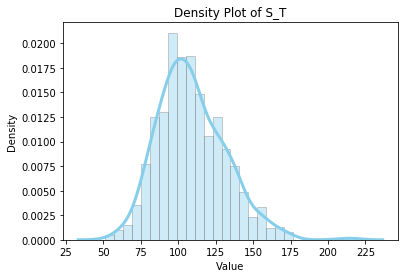

In [7]:
ST = []
n = 100
for i in range(1000):
    S,t = GBM_sim(S0, alpha, T, sigma, n)
    ST.append(S[-1])
sns.distplot(ST, hist=True, kde=True, 
             color = 'skyblue',
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 3})
plt.title('Density Plot of S_T')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

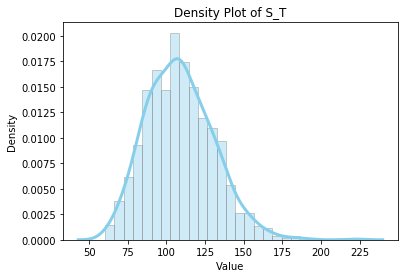

In [8]:
ST = []
S0 = 100
r = 0.03
alpha = 0.08
sigma = 0.2
n = 100
for i in range(1000):
    logy = np.random.normal(1/n * (alpha - 1/2 * sigma**2), sigma/np.sqrt(n), n)
    ST.append(S0 * np.exp(sum(logy)))
sns.distplot(ST, hist=True, kde=True, 
             color = 'skyblue',
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 3})
plt.title('Density Plot of S_T')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

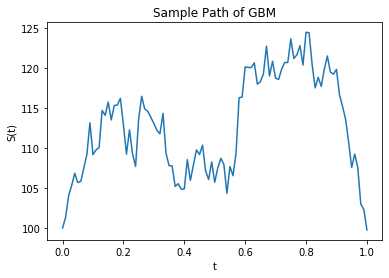

In [9]:
# Plotting sample path (for visual inspection)
n = 100
path = GBM_sim(S0,alpha,T,sigma,n)
plt.plot(path[1], path[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Sample Path of GBM')
plt.show()

In [5]:
def Hedging(n,r,alpha,sigma,K,T,S0):
    path = GBM_sim(S0,alpha,T,sigma,n)
    
    S = path[0]
    ts = path[1]
    Delta_t = []
    X = []
    C = []
    X_t = 0
    t = 0
    for j in range(n+1):
        t = (j/n)*T
        St = S[j]
        X_t = delta_t*St + eta_t*np.exp(r*(T/n)) if j!=0 else Call(t,S0,T,K,r,sigma)
        delta_t = Delta(t,St,T,K,r,sigma)
        eta_t = X_t - delta_t*St
        
        X.append(X_t)
        Delta_t.append(delta_t)
        C.append(Call(t,St,T,K,r,sigma))
    
    return Delta_t, X, C, ts, S

In [11]:
T,S0,K,r,alpha,sigma=1,100,100,0.03,0.08,0.2
n = 100
Delta_t, X, C, ts, S = Hedging(n,r,alpha,sigma,K,T,S0)

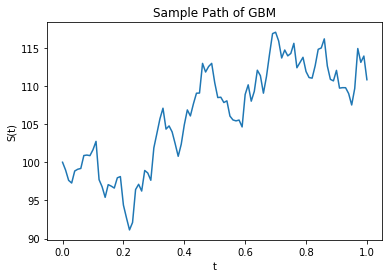

In [12]:
plt.plot(ts, S)
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Sample Path of GBM')
plt.show()

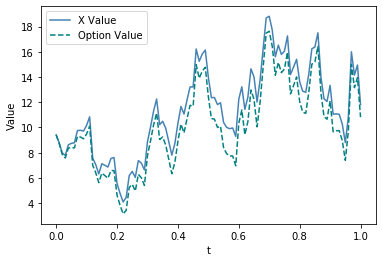

In [13]:
plt.plot(ts, X,label = "X Value", linestyle="-",color='steelblue')
plt.plot(ts, C, label = "Option Value", linestyle="--",color='teal')
plt.xlabel('t')
plt.ylabel('Value')
plt.legend()
plt.show()

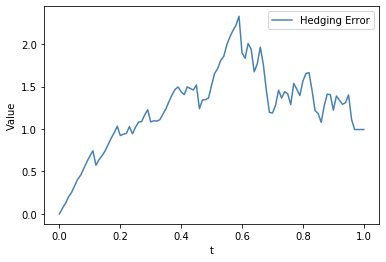

In [14]:
plt.plot(ts, [X[i]-C[i] for i in range(len(X))],label = "Hedging Error", linestyle="-",color='steelblue')
plt.xlabel('t')
plt.ylabel('Value')
plt.legend()
plt.show()

In [6]:
def path_sim(n, r, alpha, sigma, K, T, S0, path_num=100):
    Deltas = np.zeros((n+1,path_num))
    Xs =  np.zeros((n+1,path_num))
    Cs =  np.zeros((n+1,path_num))
    tss =  np.zeros((n+1,path_num))
    Ss =  np.zeros((n+1,path_num))
    for i in range(path_num):
        Delta_t, X, C, ts, S  = Hedging(n,r,alpha,sigma,K,T,S0)
        Deltas[:,i] = Delta_t
        Xs[:,i] = X
        Cs[:,i] = C
        tss[:,i] = ts
        Ss[:,i] = S
    return Deltas, Xs, Cs, tss, Ss

In [16]:
Deltas, Xs, Cs, tss, Ss = path_sim(n, r, alpha, sigma, K, T, S0)

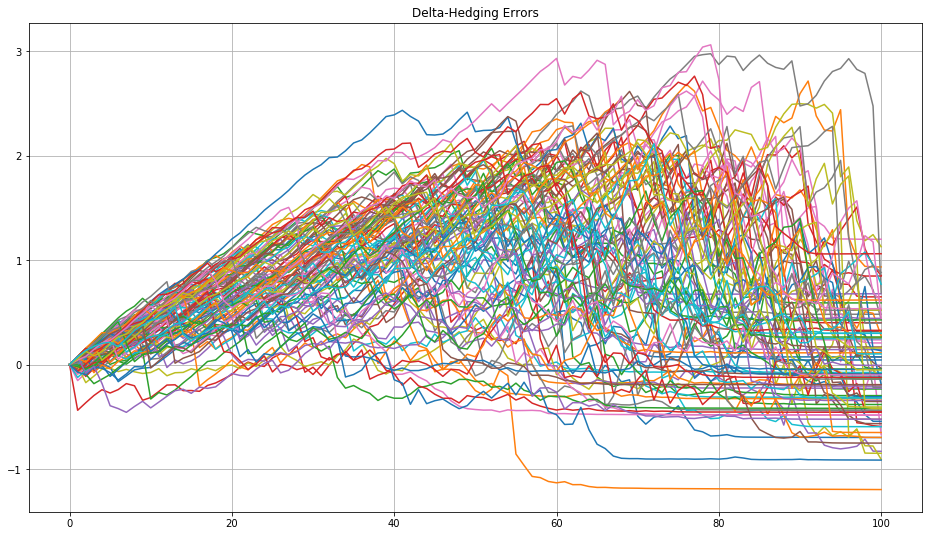

In [17]:
plt.figure(figsize=(16,9))
plt.plot(Xs-Cs)
plt.grid(True)
plt.title("Delta-Hedging Errors")
plt.show()

In [7]:
means=[]
means_abs = []
variances=[]
for n in range(20,2001,20):
    Deltas, Xs, Cs, tss, Ss = path_sim(n, r, alpha, sigma, K, T, S0)
    erros=Xs[-1,:]-Cs[-1,:]
    means.append(np.mean(erros))
    means_abs.append(np.mean(np.abs(erros)))
    variances.append(np.var(erros))

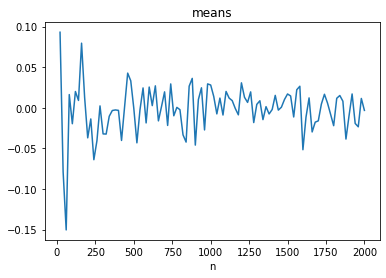

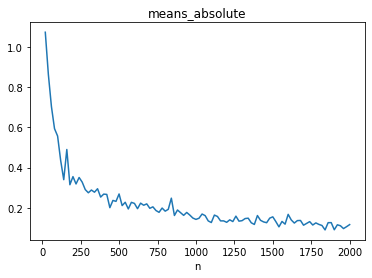

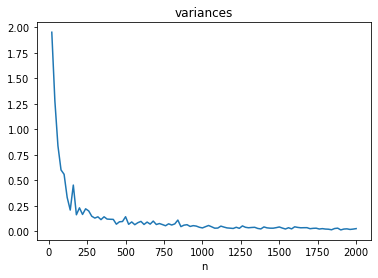

In [8]:
plt.plot(range(20,2001,20),means)
plt.title("means")
plt.xlabel("n")
plt.show()
plt.plot(range(20,2001,20),means_abs)
plt.title("means_absolute")
plt.xlabel("n")
plt.show()
plt.plot(range(20,2001,20),variances)
plt.title("variances")
plt.xlabel("n")
plt.show()